In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize each pixel intensity to be in the [0, 1] range.
X_train = train_images / 255.0

# Reshape the images to have a single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = train_labels

# Normalize each pixel intensity to be in the [0, 1] range.
X_test = test_images / 255.0

# Reshape the images to have a single channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = test_labels

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


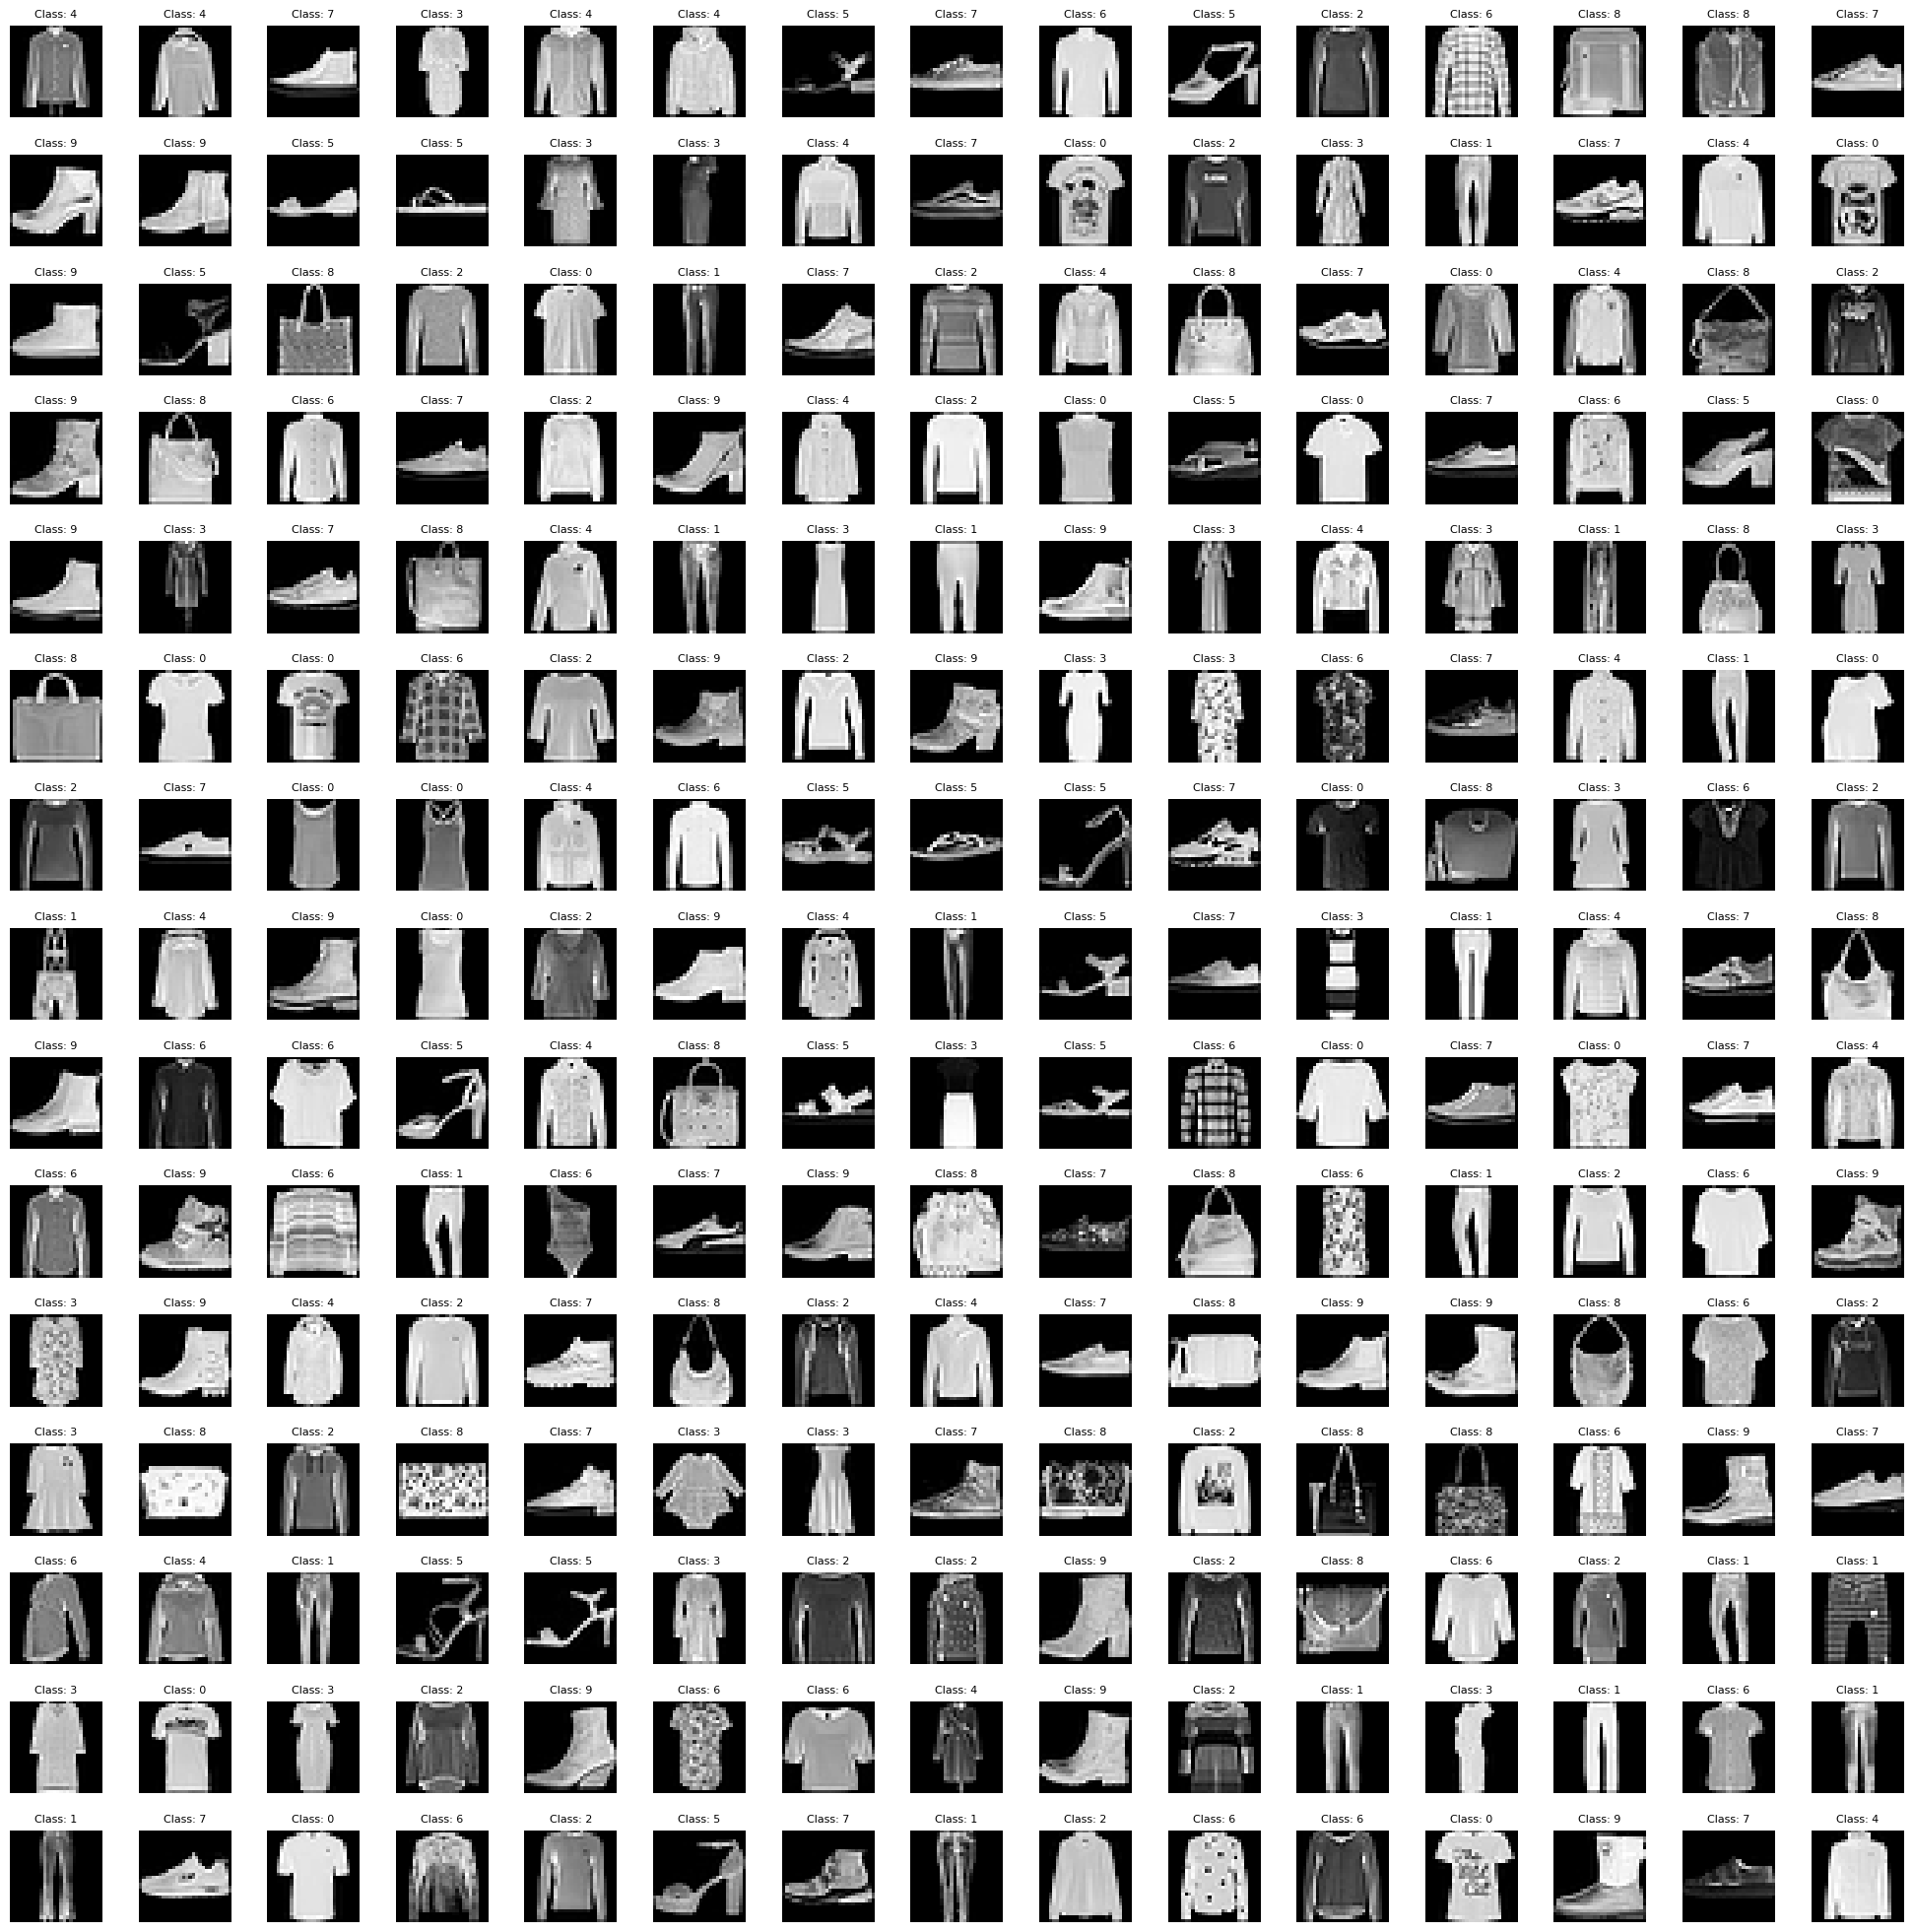

In [23]:

# Dimensions of the image grid.
grid_width = 15
grid_height = 15

fig, axes = plt.subplots(grid_height, grid_width, figsize=(25, 25))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    # Draft random index to get random image.
    index = np.random.randint(0, train_images.shape[0])
    axes[i].imshow(train_images[index], cmap='gray')
    # Show image class label above the drafted image.
    axes[i].set_title("Class: " + str(train_labels[index]), fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

plt.show()

In [24]:
from tensorflow.keras import models, layers
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(layers.Flatten())

# Each fully connected has half its input as its number of neurons.
cnn_model.add(layers.Dense(250, activation='relu'))
cnn_model.add(layers.Dense(125, activation='relu'))
cnn_model.add(layers.Dense(60, activation='relu'))

# 10 neurons in the last layer as we have 10 classes.
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [26]:
from tensorflow.keras import callbacks
early_stopping_callback = callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20

cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

import time
start_time = time.time()
# Fit model
epochs_info = cnn_model.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=500,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)
training_time = time.time() - start_time

Epoch 1/500
17/17 [==============================] - 19s 980ms/step - loss: 1.7442 - accuracy: 0.4511 - val_loss: 1.0328 - val_accuracy: 0.5812
Epoch 2/500
17/17 [==============================] - 15s 878ms/step - loss: 0.9298 - accuracy: 0.6457 - val_loss: 0.7979 - val_accuracy: 0.7099
Epoch 3/500
17/17 [==============================] - 15s 864ms/step - loss: 0.7359 - accuracy: 0.7242 - val_loss: 0.6797 - val_accuracy: 0.7283
Epoch 4/500
17/17 [==============================] - 17s 988ms/step - loss: 0.6448 - accuracy: 0.7548 - val_loss: 0.6142 - val_accuracy: 0.7666
Epoch 5/500
17/17 [==============================] - 16s 926ms/step - loss: 0.5806 - accuracy: 0.7793 - val_loss: 0.5579 - val_accuracy: 0.7869
Epoch 6/500
17/17 [==============================] - 15s 889ms/step - loss: 0.5331 - accuracy: 0.7965 - val_loss: 0.5354 - val_accuracy: 0.7957
Epoch 7/500
17/17 [==============================] - 16s 954ms/step - loss: 0.4985 - accuracy: 0.8112 - val_loss: 0.4924 - val_accuracy:

In [27]:
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 1129.73 seconds


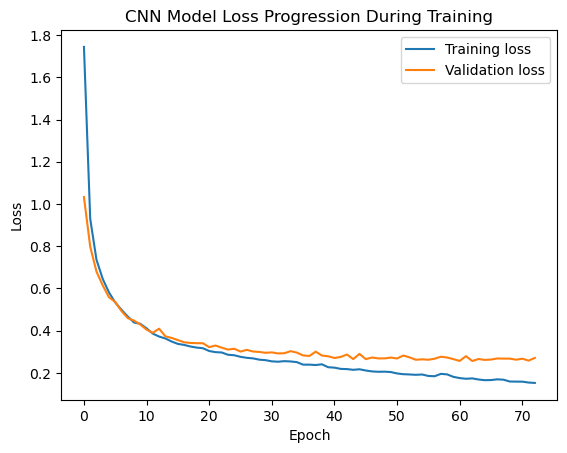

In [28]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

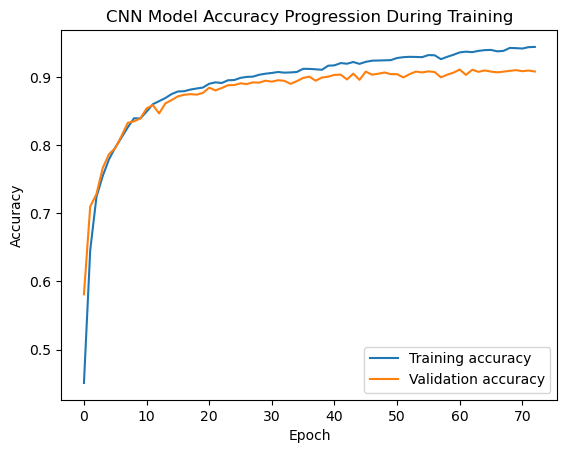

In [29]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("CNN Model Accuracy Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [30]:
start_time = time.time()
cnn_model.evaluate(X_test, y_test)
testing_time = time.time() - start_time

313/313 [==============================] - 2s 5ms/step - loss: 0.2818 - accuracy: 0.9065


In [31]:
print(f"Testing Time: {testing_time:.2f} seconds")

Testing Time: 2.10 seconds


313/313 [==============================] - 2s 5ms/step


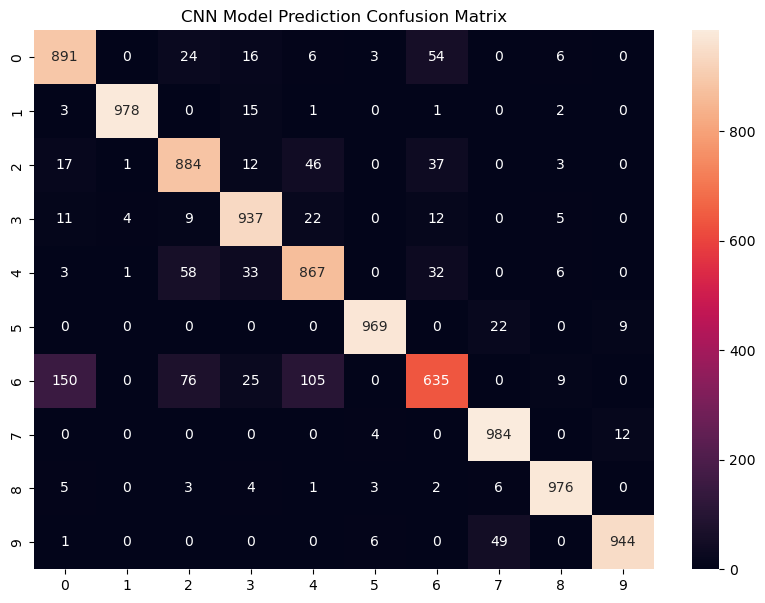

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn_model.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
class_names = ["Class 0 => T-shirt",
               "Class 1 => Trouser",
               "Class 2 => Pullover",
               "Class 3 => Dress",
               "Class 4 => Coat",
               "Class 5 => Sandal",
               "Class 6 => Shirt",
               "Class 7 => Sneaker",
               "Class 8 => Bag",
               "Class 9 => Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))
     

                       precision    recall  f1-score   support

   Class 0 => T-shirt       0.82      0.89      0.86      1000
   Class 1 => Trouser       0.99      0.98      0.99      1000
  Class 2 => Pullover       0.84      0.88      0.86      1000
     Class 3 => Dress       0.90      0.94      0.92      1000
      Class 4 => Coat       0.83      0.87      0.85      1000
    Class 5 => Sandal       0.98      0.97      0.98      1000
     Class 6 => Shirt       0.82      0.64      0.72      1000
   Class 7 => Sneaker       0.93      0.98      0.95      1000
       Class 8 => Bag       0.97      0.98      0.97      1000
Class 9 => Ankle boot       0.98      0.94      0.96      1000

             accuracy                           0.91     10000
            macro avg       0.91      0.91      0.90     10000
         weighted avg       0.91      0.91      0.90     10000



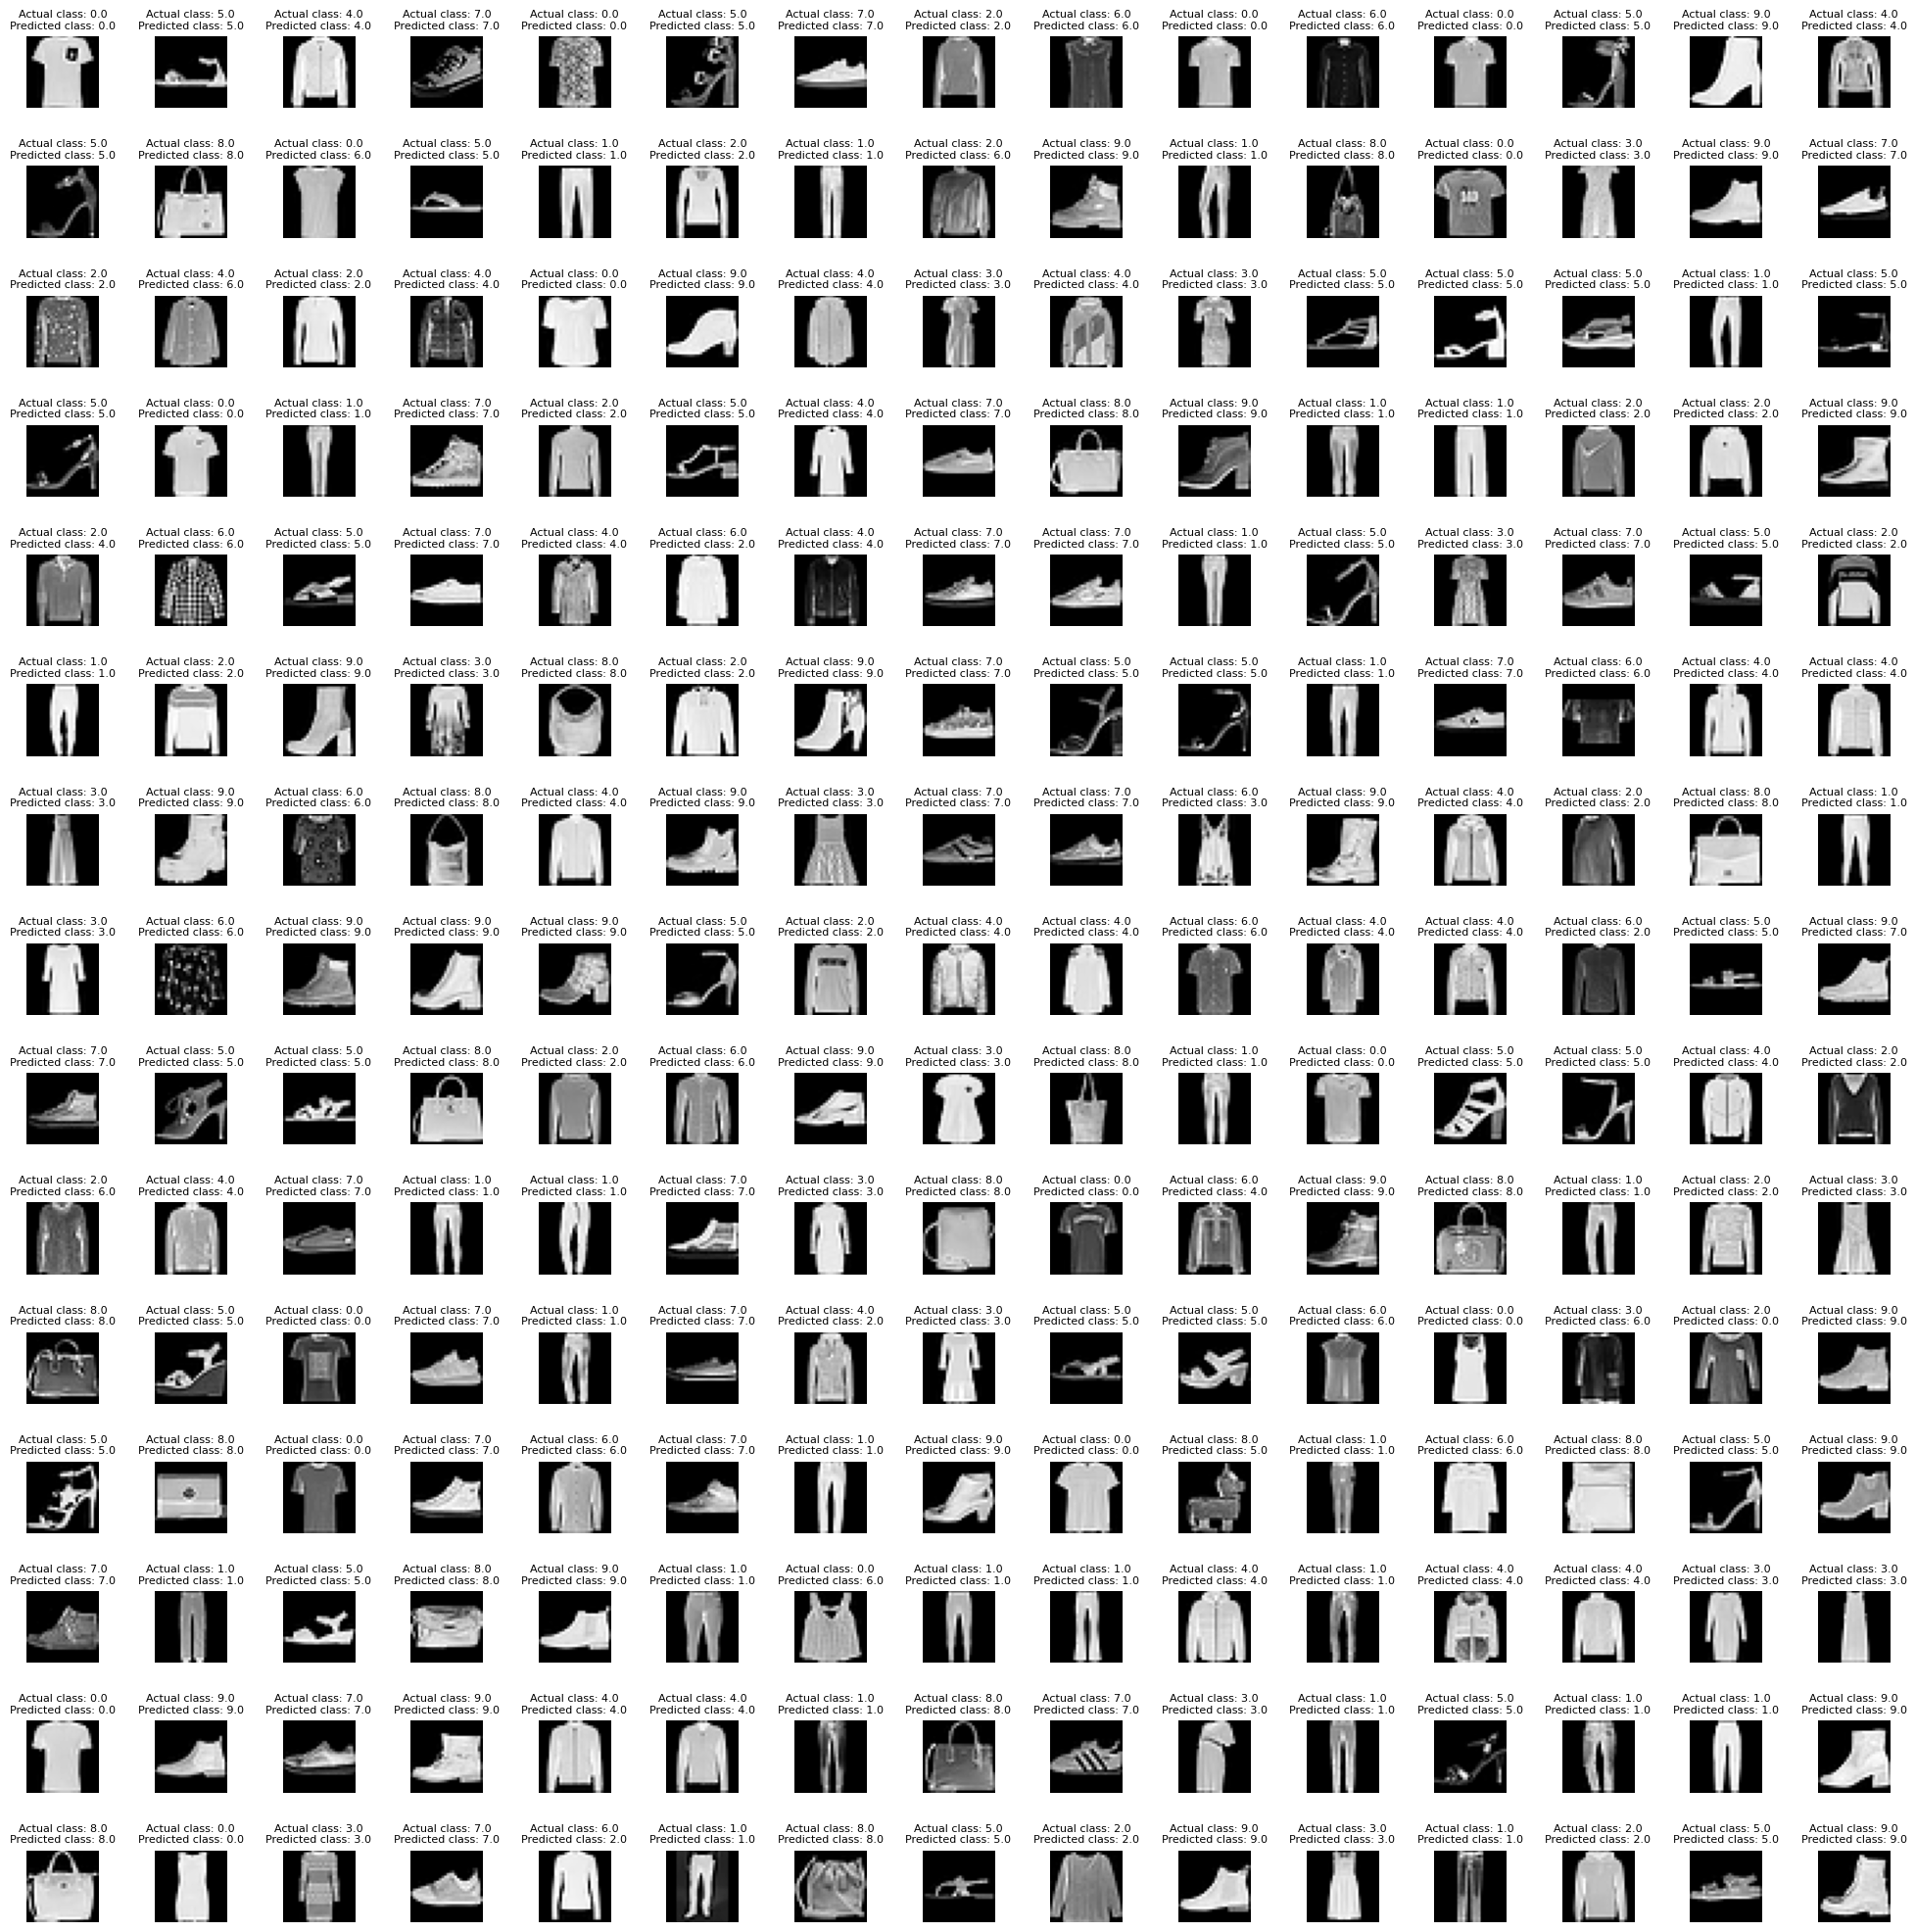

In [35]:
grid_height = 15
grid_width = 15

fig, axes = plt.subplots(grid_height, grid_width, figsize=(25, 25))
axes = axes.ravel()

for i in range(grid_height * grid_width):
    # Draft random index to plot random image.
    drafted_image = np.random.randint(0, X_test.shape[0])
    axes[i].imshow(X_test[drafted_image].reshape(28, 28), cmap='gray')
    # Print actual and predicted labels for image.
    axes[i].set_title("Actual class: {:0.1f}\nPredicted class: {:0.1f}".format(
        y_test[drafted_image], y_pred_classes[drafted_image]), fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.8)

In [39]:
from tensorflow.keras.models import load_model, save_model
cnn_model.save(r"C:\Users\Admin\Downloads\dl_model\new_fashion.h5")

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 17ms/step
Testing Time: 0.08 seconds


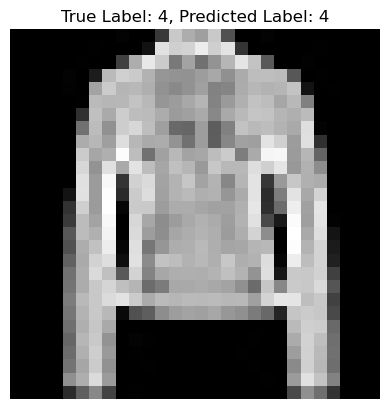

In [40]:
#random image classifi
import time

# Assuming cnn_model is your trained model

# Select a random index from the test data
random_index = np.random.randint(0, len(X_test))

# Get the random image and its corresponding label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Start the timer
start_time = time.time()

# Make predictions on the random image
prediction = cnn_model.predict(np.expand_dims(random_image, axis=0))

# End the timer
end_time = time.time()

# Get the predicted label
predicted_label = np.argmax(prediction)

# Print the testing time
testing_time = end_time - start_time
print(f"Testing Time: {testing_time:.2f} seconds")

# Display the random image and its true and predicted labels
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


In [41]:
#test data gui
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the trained model
cnn_model = load_model(r"C:\Users\Admin\Downloads\dl_model\new_fashion.h5")

# Function to predict a random image
def predict_random_image():
    # Select a random index from the test data
    random_index = np.random.randint(0, len(X_test))
    # Get the random image and its corresponding label
    random_image = X_test[random_index]
    true_label = y_test[random_index]
    
    # Start the timer
    start_time = time.time()
    
    # Make predictions on the random image
    prediction = cnn_model.predict(np.expand_dims(random_image, axis=0))
    
    # End the timer
    end_time = time.time()
    
    # Get the predicted label
    predicted_label = np.argmax(prediction)
    
    # Print the testing time
    testing_time = end_time - start_time
    print(f"Testing Time: {testing_time:.2f} seconds")
    
    # Display the image and its labels in the GUI
    img = Image.fromarray(random_image.squeeze() * 255)  # Convert image array to PIL image
    img = img.resize((200, 200))  # Resize image for display
    
    # Update the image in the GUI
    photo = ImageTk.PhotoImage(img)
    image_label.config(image=photo)
    image_label.image = photo
    
    # Update the labels in the GUI
    true_label_var.set(f"True Label: {true_label}")
    predicted_label_var.set(f"Predicted Label: {predicted_label}")

# Create a Tkinter window
root = tk.Tk()
root.title("Random Image Predictor")

# Load your test data here
# Assuming X_test and y_test are defined

# Create GUI elements
image_frame = ttk.Frame(root)
image_frame.pack(padx=10, pady=10)

image_label = ttk.Label(image_frame)
image_label.pack()

true_label_var = tk.StringVar()
true_label_label = ttk.Label(root, textvariable=true_label_var)
true_label_label.pack()

predicted_label_var = tk.StringVar()
predicted_label_label = ttk.Label(root, textvariable=predicted_label_var)
predicted_label_label.pack()

predict_button = ttk.Button(root, text="Predict Random Image", command=predict_random_image)
predict_button.pack(pady=10)

# Run the Tkinter event loop
root.mainloop()


1/1 [==============================] - 0s 141ms/step
Testing Time: 0.28 seconds


In [1]:
#gui color input image
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the trained model
cnn_model = load_model(r"C:\Users\Admin\Downloads\dl_model\new_fashion.h5")


#         uploaded_image_label.image = photo
class_names = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def predict_image():
    # Open file dialog to select an image file
    file_path = filedialog.askopenfilename(filetypes=[("PNG files", "*.png")])
    if file_path:
        # Load and preprocess the image
        img = Image.open(file_path).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize image to match model input shape
        img = np.array(img)
        img = img.reshape((1, 28, 28, 1))  # Add batch dimension
        
        # Start the timer
        start_time = time.time()
        
        # Make predictions on the image
        prediction = cnn_model.predict(img)
        
        # End the timer
        end_time = time.time()
        
        # Get the predicted label
        predicted_label_index = np.argmax(prediction)
        predicted_label_name = class_names[predicted_label_index]
        
        # Print the prediction and time taken
        prediction_label.config(text=f"Predicted Label: {predicted_label_name}")
        prediction_time.config(text=f"Prediction Time: {end_time - start_time:.2f} seconds")

        # Display the uploaded image
        img = Image.open(file_path)
        img = img.resize((200, 200))
        photo = ImageTk.PhotoImage(img)
        uploaded_image_label.config(image=photo)
        uploaded_image_label.image = photo

# Create a Tkinter window
root = tk.Tk()
root.title("Image Label Prediction")

# Create GUI elements
upload_button = ttk.Button(root, text="Upload Image", command=predict_image)
upload_button.pack(pady=10)

uploaded_image_label = ttk.Label(root)
uploaded_image_label.pack()

prediction_label = ttk.Label(root, text="Predicted Label: ")
prediction_label.pack()

prediction_time = ttk.Label(root, text="Prediction Time: ")
prediction_time.pack()

# Run the Tkinter event loop
root.mainloop()

1/1 [==============================] - 0s 125ms/step


In [ ]:
# pullover,shirt,

In [3]:
from tkinter import filedialog
from PIL import Image
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the trained model
cnn_model = load_model(r"C:\Users\Admin\Downloads\dl_model\new_fashion.h5")

class_names = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def predict_image(file_path):
    # Load and preprocess the image
    img = Image.open(file_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize image to match model input shape
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))  # Add batch dimension

    # Start the timer
    start_time = time.time()

    # Make predictions on the image
    prediction = cnn_model.predict(img)

    # End the timer
    end_time = time.time()

    # Get the predicted label
    predicted_label_index = np.argmax(prediction)
    predicted_label_name = class_names[predicted_label_index]

    # Print the prediction and time taken
    print(f"Predicted Label: {predicted_label_name}")
    print(f"Prediction Time: {end_time - start_time:.2f} seconds")

# Open file dialog to select an image file
# file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
file_path=input("Enter the file path of the image: ")
# Perform prediction if a file is selected
if file_path:
    predict_image(file_path)


Enter the file path of the image: C:\Users\Admin\Downloads\WhatsApp Image 2024-04-22 at 12.14.20 AM.jpeg
1/1 [==============================] - 0s 78ms/step
Predicted Label: Pullover
Prediction Time: 0.11 seconds
